<a href="https://colab.research.google.com/github/appleissteve1976/ML-Implementation/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
##### DATASET GENERATION #####
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Data set

In [ ]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)

In [ ]:
'''
samples = X.shape[0]
features = X.shape[1]
'''

'\nsamples = X.shape[0]\nfeatures = X.shape[1]\n'

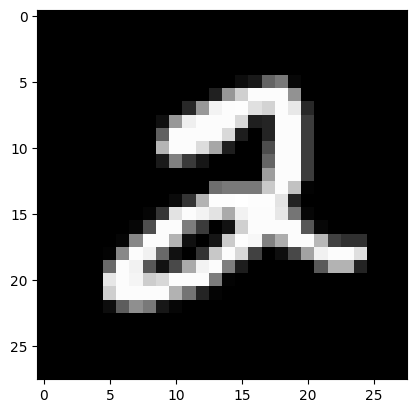

In [ ]:
import matplotlib.pyplot as plt
img = X[0].reshape(28, 28)
plt.imshow(img, cmap = 'gray');

centering the data

In [ ]:
def center(X):
    return X - X.mean(axis = 0)

n, d = X.shape
X_prime = center(X)
print(np.sqrt((X_prime ** 2).sum()) / (n * d))

0.23242174456564685


Covariance

In [ ]:
def covariance(X):
    return X.T @ X / X.shape[0]

C = covariance(X_prime)
d = C.shape[0]
print(np.sqrt((C ** 2).sum()) / d ** 2)

1.3648061009232249


In [ ]:
def compute_pc(C):
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:, -1], eigvec[:, -2]
    assert w_1.shape[0] == w_2.shape[0] == d
    return w_1, w_2

w_1, w_2 = compute_pc(C)
w = w_1 + w_2
print(abs(w.sum()))

1.051624388059819


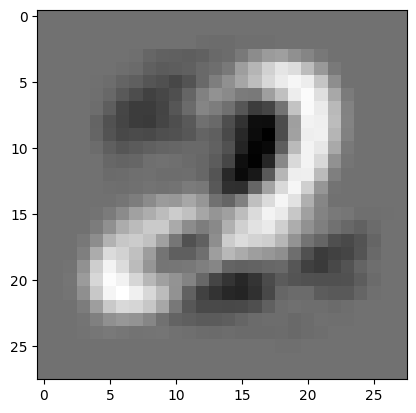

In [ ]:
w_1_image = w_1.reshape(28, 28)
plt.imshow(w_1_image, cmap = 'gray')

Choose K principal components for maximum variance (95%)

In [ ]:
def choose_k(C):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    tot = sum(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k + 1]) / tot >= 0.95:
            return k + 1
    return len(eigval)

print(choose_k(C))

53


difference variance for a test image

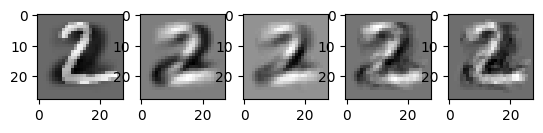

In [ ]:
# Solution
def reconstruct(C, test_image, thresh):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    tot = sum(eigval)
    K = len(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k + 1]) / tot >= thresh:
            K = k + 1
            break
    W = eigvec[:, -K: ]
    coeff = test_image @ W
    return W @ coeff

# Original mean subtracted image
test_image = np.float64(test_image) - X.mean(axis = 0)
plt.subplot(1, 5, 1)
plt.imshow(test_image.reshape(28, 28), cmap = 'gray')
# 0.20
recon_image = reconstruct(C, test_image, 0.20)
plt.subplot(1, 5, 2)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.5
recon_image = reconstruct(C, test_image, 0.50)
plt.subplot(1, 5, 3)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.80
recon_image = reconstruct(C, test_image, 0.80)
plt.subplot(1, 5, 4)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.95
plt.subplot(1, 5, 5)
recon_image = reconstruct(C, test_image, 0.95)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')